### Loading CSV file

In [1]:
df = pd.read_csv(body)
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df2 = df.drop(['area_type','society','availability'],axis=1)
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

### Handling Null Values

In [8]:
df2['balcony'] = df2.balcony.fillna(df2.balcony.median())

In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [10]:
df_data = df2.dropna()
df_data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

### Data Cleaning

In [11]:
df_data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df_data['bhk'] = df_data['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-12-64d08298eff8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['bhk'] = df_data['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
df_data.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [14]:
df_data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df_data[~df_data.total_sqft.apply(is_float)].head()

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2


In [17]:
def convert_float(x):
    t=x.split('-')
    if len(t)==2:
        return (float(t[0])+float(t[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
df_data2 = df_data.copy()
df_data2['total_sqft'] = df_data['total_sqft'].apply(convert_float)
df_data2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [19]:
df3 = df_data2.copy()
df3.location = df3.location.apply(lambda x: x.strip())
locations = df3.groupby('location')['location'].count().sort_values(ascending=False)
locations.head()

location
Whitefield         535
Sarjapur  Road     392
Electronic City    304
Kanakpura Road     266
Thanisandra        236
Name: location, dtype: int64

In [20]:
loc_lessthan_10 = locations[locations<=10]

In [21]:
loc_lessthan_10.head(20)

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
Dairy Circle             10
Naganathapura            10
Sadashiva Nagar          10
Nagadevanahalli          10
BTM 1st Stage            10
Nagappa Reddy Layout     10
Dodsworth Layout         10
Ganga Nagar              10
2nd Phase JP Nagar        9
Volagerekallahalli        9
Yemlur                    9
4th Block Koramangala     9
Lingarajapuram            9
Medahalli                 9
Kaverappa Layout          9
Name: location, dtype: int64

In [22]:
df3['location'] = df3.location.apply(lambda x: 'other' if x in loc_lessthan_10 else x)

In [23]:
len(df3['location'].unique())

242

In [24]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


Let's assume total_sqft/bedroom should be 300 or more sq_ft, Now we will remove outliers.

In [25]:
df3[df3.total_sqft/df3.bhk<300].head()

,location,size,total_sqft,bath,balcony,price,bhk
9,other,6 Bedroom,1020.0,6.0,2.0,370.0,6
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3


In [26]:
df4 = df3[~(df3.total_sqft/df3.bhk<300)]

In [27]:
df4['price_per_sqft'] = df4.price*100000/df4.total_sqft

<ipython-input-27-9b4cce3e8787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price_per_sqft'] = df4.price*100000/df4.total_sqft


In [28]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [29]:
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


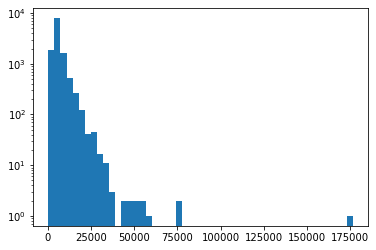

In [30]:
plt.hist(df4.price_per_sqft,bins=50)
plt.yscale('log')

### Outliers removal using quantile method

In [31]:
l_limit,u_limit = df4.price_per_sqft.quantile([0.001,0.999])

In [32]:
df4 = df4[(df4.price_per_sqft>l_limit) & (df4.price_per_sqft<u_limit)]
df4.shape

(12430, 8)

### Outliers removal using 4 standard deviation

In [33]:
u_limit,l_limit = df4.price_per_sqft.mean()+4*df4.price_per_sqft.std(),df4.price_per_sqft.mean()-4*df4.price_per_sqft.std()
u_limit,l_limit

(20526.474715098906, -8017.181952817145)

In [34]:
df4 = df4[(df4.price_per_sqft>l_limit) & (df4.price_per_sqft<u_limit)]
df4.shape

(12298, 8)

### Normal distribution

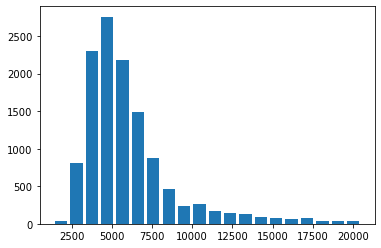

In [41]:
plt.hist(df4.price_per_sqft,bins=20,rwidth=0.8);

 Minimum price_per_sqft is 268rs which is very low and Maximum is 176470rs which very high in bangalore.

In [42]:
def rmv_outliers(df):
    df_out  = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out

In [43]:
df4 = rmv_outliers(df4)
df4.shape

(9585, 8)

In [44]:
b2 = df4[(df4.location=='Rajaji Nagar') & (df4.bhk==2)]
b3 = df4[(df4.location=='Rajaji Nagar') & (df4.bhk==3)]

Remove the data where price of 2bhk is more than 3bhk with same sqft.

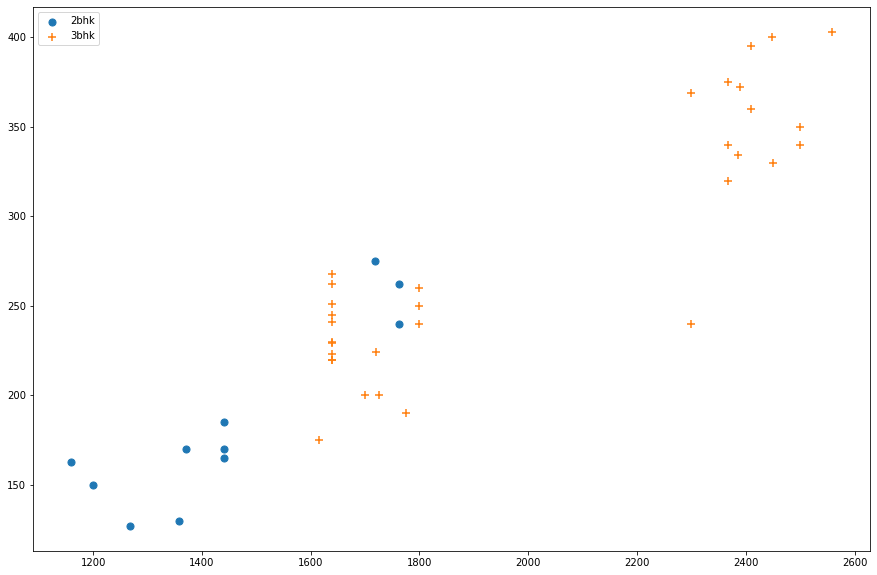

In [45]:
plt.figure(figsize=(15,10))
plt.scatter(b2.total_sqft,b2.price,s=50,label='2bhk')
plt.scatter(b3.total_sqft,b3.price,marker='+',s=50,label='3bhk')
plt.legend()

Text(0, 0.5, 'count')

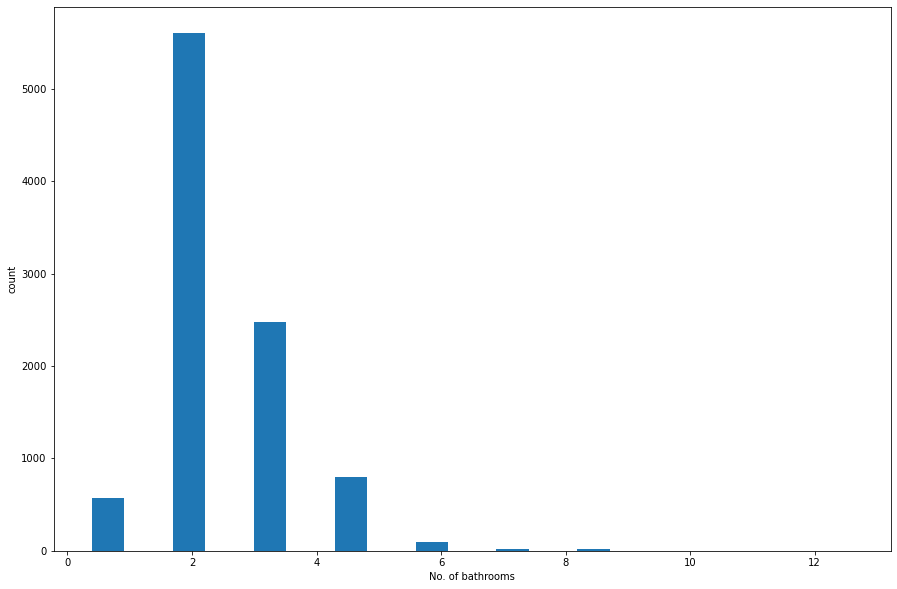

In [46]:
plt.figure(figsize=(15,10))
plt.hist(df4.bath,range=[0,13],rwidth=0.4)
plt.xlabel('No. of bathrooms')
plt.ylabel('count')

Remove the data which have 2 more bathrooms than room.

In [47]:
df5 = df4[df4.bath>df4.bhk+2]
df5

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1554,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
4963,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
6404,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
7980,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [48]:
df6 = df4[df4.bath<df4.bhk+2]
df6.shape

(9506, 8)

We have removed outliers, now drop the columns which are of no use like 'price_per_sqft' as it is used only for outlier detection and drop 'size' also, as 'bhk' column can be used in place of 'size'.

In [49]:
data_df = df6.drop(['price_per_sqft','size'],1)

In [50]:
data_df.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [51]:
data_df=data_df.dropna()

## MODEL BUILDING

In [52]:
dummies = pd.get_dummies(data_df.location)
data_df = pd.concat([data_df.drop('location',1),dummies.drop('other',1)],axis=1)

In [53]:
data_df.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9506 entries, 0 to 9584
Columns: 246 entries, total_sqft to Yeshwanthpur
dtypes: float64(4), int64(1), uint8(241)
memory usage: 2.6 MB


In [55]:
x,y = data_df.drop(['price'],1),data_df.price

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

### Feature Selection

In [58]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0)
vt.fit_transform(x_train)
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [59]:
column= [col for col in x_train.columns if col not in x_train.columns[vt.get_support()]]
len(column)

0

In [60]:
def correlation(df,threshold):
    cor=x_train.corr()
    col=set()
    for i in range(len(cor.columns)):
        for j in range(i):
            if abs(cor.iloc[i,j]>threshold):
                colname=cor.columns[j]
                col.add(colname)
    return col

In [61]:
column=correlation(x_train,0.85)
print(column)

{'bath'}


In [62]:
def correlation(df,threshold):
    cor=x_train.corr()
    col=set()
    for i in range(len(cor.columns)):
        for j in range(i):
            if abs(cor.iloc[i,j]>threshold):
                colname=cor.columns[i]
                col.add(colname)
    return col

In [63]:
column=correlation(x_train,0.85)
print(column)

{'bhk'}


As we can se 'bhk' and 'bath' columns have 0.85 threshold, so we can drop any one of them.

In [64]:
x_train,x_test = x_train.drop('bath',1),x_test.drop('bath',1)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9062198286999491

### Score of model using cross validation

In [67]:
from sklearn.model_selection import cross_val_score,ShuffleSplit

In [68]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x_train,y_train,cv=cv).mean()

0.8691531271377843

In [69]:
x_train.columns

Index(['total_sqft', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [70]:
def predict_price(location,total_sqft,balcony,bhk):
    loc_index = np.where(x_train.columns==location)[0][0]
    i = np.zeros(len(x_train.columns))
    i[0]=total_sqft
    i[1]=balcony
    i[2]=bhk
    if loc_index>=0:
        i[loc_index]=1
    return str(lr.predict([i])[0])+' lakh'


In [71]:
predict_price('Vijayanagar',1000,2,3)

'64.64572556629841 lakh'

import pickle
with open('house_price_pred.pickle','wb') as f:
    pickle.dump(lr,f)

import json
columns = {'data_col':[col.lower() for col in x_train.columns]}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))